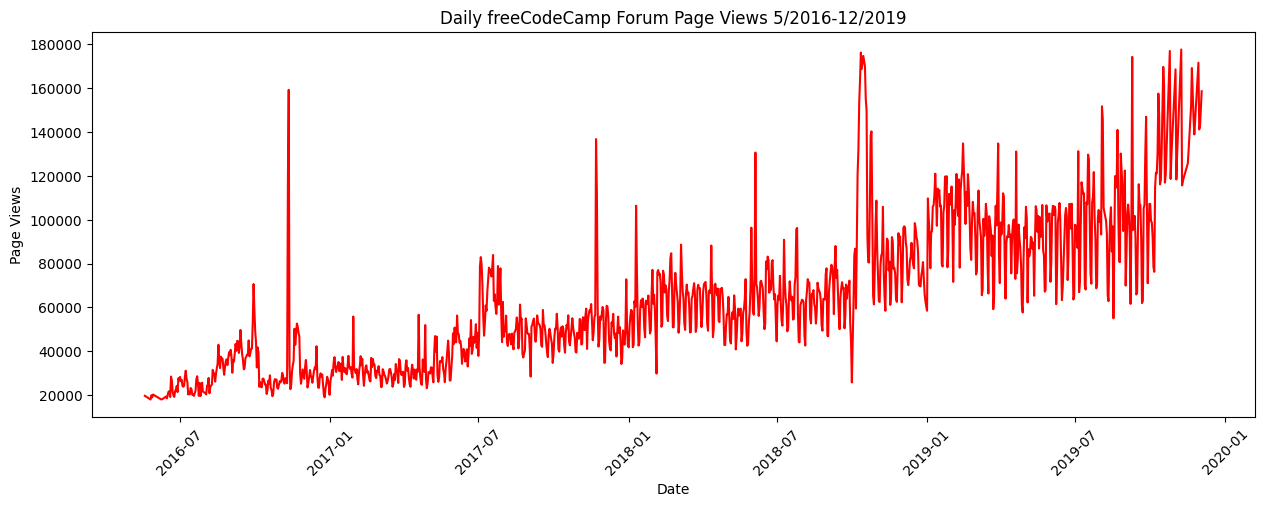

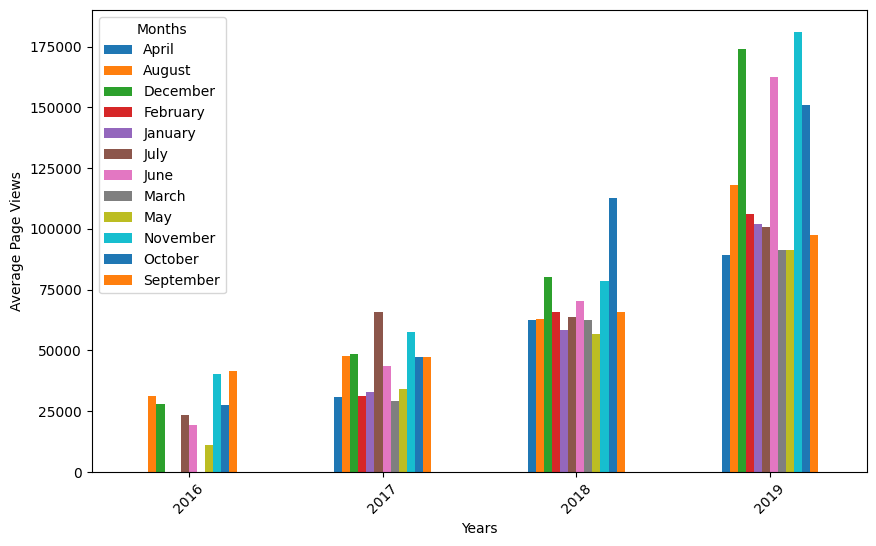

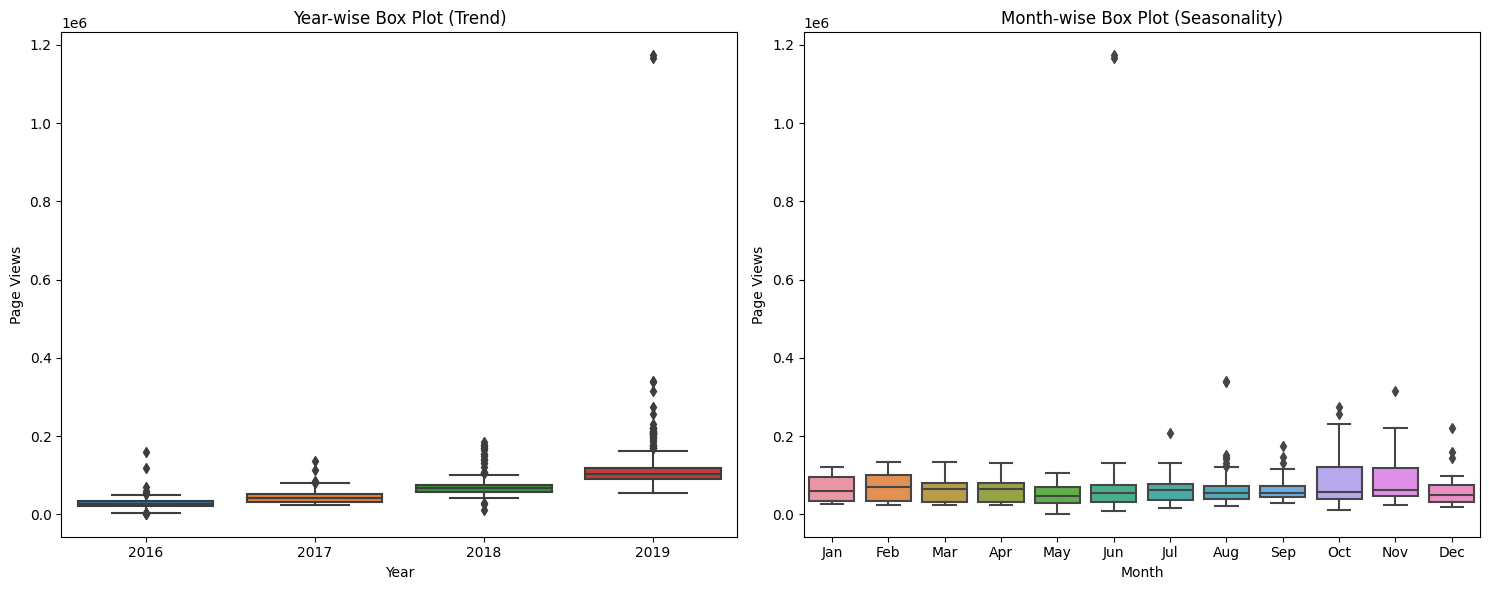

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def draw_line_plot():
    # Read the data from "fcc-forum-pageviews.csv"
    df = pd.read_csv('/content/archive (91).zip', parse_dates=['date'], index_col='date')

    # Clean the data by filtering out the top and bottom 2.5% of page views
    df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

    # Create a line plot using Matplotlib
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='r')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xticks(rotation=45)
    plt.savefig('line_plot.png')

def draw_bar_plot():
    # Read the data from "fcc-forum-pageviews.csv"
    df = pd.read_csv('/content/archive (91).zip', parse_dates=['date'], index_col='date')

    # Extract the year and month from the date
    df['year'] = df.index.year
    df['month'] = df.index.strftime('%B')

    # Group the data by year and month and calculate the average page views
    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()

    # Create a bar plot using Matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    plt.xticks(rotation=45)
    plt.savefig('bar_plot.png')

def draw_box_plot():
    # Read the data from "fcc-forum-pageviews.csv"
    df = pd.read_csv('/content/archive (91).zip', parse_dates=['date'], index_col='date')

    # Extract the year and month from the date
    df['year'] = df.index.year
    df['month'] = df.index.strftime('%b')

    # Create a copy of the data frame for box plots
    df_box = df.copy()

    # Assign month and year names for proper sorting
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_names, ordered=True)

    # Sort the data frame by month for the month-wise box plot
    df_box.sort_values('month', inplace=True)

    # Create two adjacent box plots using Seaborn
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    plt.tight_layout()
    plt.savefig('box_plot.png')

# Call the functions to generate the plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
